# Get Tweets
This notebook collects tweets from the Twitter API and saves them as JSON to MyDrive in Google Drive.

### <font color='red'> Mount Drive before running cell </font>
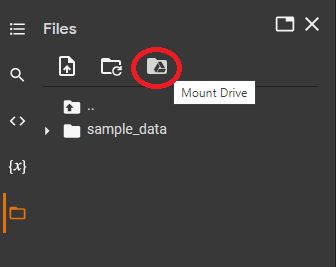

In [1]:
# copy credentials file over from MyDrive
!cp "/content/drive/MyDrive/Data+ Training/🎓 Capstone/credentials.json" /content/credentials.json

In [2]:
# make credentials available to notebook
import json
with open('credentials.json','r') as f:
    creds = json.load(f)[0]

In [3]:
!pip install twitter
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

auth = twitter.oauth.OAuth(
    creds["OAUTH_TOKEN"], creds["OAUTH_TOKEN_SECRET"],
    creds["CONSUMER_KEY"], creds["CONSUMER_SECRET"])

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

     |████████████████████████████████| 50 kB 3.6 MB/s 


## Pinging Twitter API for Wordle-related tweets



## Get Today's Wordle Tweets

Pattern:
```
Wordle # X/6

e.g.
Wordle 251 3/6

```

Note: Remove troll tweets

In [4]:
from urllib.parse import unquote

search_results = twitter_api.search.tweets(
    q="Wordle 230",
    count=100
    )
statuses = search_results['statuses']

for _ in range(1000):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e:
        break
    
    kwargs = dict([kv.split('=') for kv in unquote(next_results[1:]).split("&")])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

Length of statuses 55
Length of statuses 55


# Save Tweets to JSON

In [5]:
with open('tweets.json', 'w') as outfile:
    json.dump(statuses, outfile)

In [6]:
# Copy to MyDrive
!cp  /content/tweets.json "/content/drive/MyDrive/Data+ Training/🎓 Capstone/wordle_240_tweets.json"